Dates-  [30, 29, 28, 27, 26, 23, 22, 21, 20, 19, 16, 15, 14, 13, 12, 9, 8, 7, 6, 5, 2, 1, 31, 30, 26, 25, 24, 23, 22, 19, 18, 17, 16, 15, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1, 28, 27, 26, 25, 24, 21, 20, 19, 18, 17, 13, 12, 11, 10, 7, 6, 5, 4, 3, 31, 30, 29, 28, 27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 3, 2, 1, 28, 27, 24, 23, 22, 21, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 3, 2, 1, 31, 30, 27, 26, 25, 24, 23, 20, 19, 18, 17, 13, 12, 11, 10, 9, 6, 5, 4, 3, 30, 29, 28, 27, 23, 22, 21, 20, 19, 16, 15, 14, 13, 12, 9, 8, 7, 6, 5, 2, 1, 30, 29, 28, 25, 23, 22, 21, 18, 17, 16, 15, 14, 11, 10, 9, 8, 7, 4, 3, 2, 1, 31, 28, 27, 26, 25, 24, 21, 20, 19, 18, 17, 14, 13, 12, 11, 10, 7, 6, 5, 4, 3, 30, 29, 28, 27, 26, 23, 22, 21, 20, 19, 16, 15, 14, 13, 12, 9, 8, 7, 6, 2, 1, 31, 30, 29, 26, 25, 24, 23, 22, 19, 18, 17, 16, 15, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1, 29, 28, 27, 26, 25, 22, 21]
Prices-  [144.45, 144.71, 144.49, 145.01, 147.17, 145.13, 145.77, 145.52, 146.87, 143.66, 143.78, 143.32,

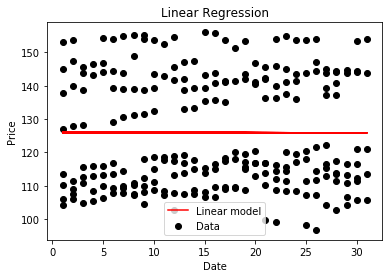


The stock open price for 29th Feb is: $ 125.891207471
The regression coefficient is  -0.00418186377476 , and the constant is  126.01248152
the relationship equation between dates and prices is: price =  -0.00418186377476 * date +  126.01248152


In [2]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader) # skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict_price(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices, (len(prices),1))
    
    linear_mod = linear_model.LinearRegression() # defining the linear regression model
    linear_mod.fit(dates, prices) # fitting the data points in the model

    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(dates, linear_mod.predict(dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return linear_mod.predict(x)[0][0], linear_mod.coef_[0][0], linear_mod.intercept_[0]

get_data('aapl.csv') # calling get_data method by passing the csv file to it
print ("Dates- ", dates)
print ("Prices- ", prices)

predicted_price, coefficient, constant = predict_price(dates, prices, 29)  
print ("\nThe stock open price for 29th Feb is: $", str(predicted_price))
print ("The regression coefficient is ", str(coefficient), ", and the constant is ", str(constant))
print ("the relationship equation between dates and prices is: price = ", str(coefficient), "* date + ", str(constant))